In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def generate_random_vectors(n_vectors=10000, vector_size=128, seed=42):
    np.random.seed(seed)
    return np.random.randn(n_vectors, vector_size)

In [3]:
def find_eigen_basis(vectors, threshold=1e-5):
    # Calculate covariance matrix
    cov_matrix = np.cov(vectors.T)
    
    # Find eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Apply threshold
    valid_mask = eigenvalues > threshold
    eigenvalues = eigenvalues[valid_mask]
    eigenvectors = eigenvectors[:, valid_mask]
    
    return eigenvalues, eigenvectors

# Function to find coefficients in eigen basis
def find_coefficients(vector, eigenvectors):
    """
    Find coefficients of vector representation in eigenvector basis
    """
    # Project vector onto eigenvectors
    coefficients = np.dot(vector, eigenvectors)
    return coefficients

# Visualize original vectors and eigenvectors using t-SNE
def visualize_vectors_tsne(vectors, eigenvectors):
    # Combine all vectors for t-SNE
    all_vectors = np.vstack([vectors, eigenvectors.T])
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(all_vectors)
    
    # Split back into original vectors and eigenvectors
    orig_vectors_2d = vectors_2d[:len(vectors)]
    eigen_vectors_2d = vectors_2d[len(vectors):]
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(orig_vectors_2d[:, 0], orig_vectors_2d[:, 1], 
                c='blue', alpha=0.5, label='Original Vectors')
    plt.scatter(eigen_vectors_2d[:, 0], eigen_vectors_2d[:, 1], 
                c='red', s=100, label='Eigenvectors')
    plt.legend()
    plt.title('t-SNE visualization of vectors and eigenvectors')
    plt.grid(True)
    return plt

def visualize_vectors_pca(vectors, eigenvectors):
    """
    Create PCA visualization of vectors and eigenvectors
    """
    # Combine all vectors
    all_vectors = np.vstack([vectors, eigenvectors.T])
    
    # Apply PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(all_vectors)
    
    # Split results
    orig_vectors_2d = vectors_2d[:len(vectors)]
    eigen_vectors_2d = vectors_2d[len(vectors):]
    
    # Create plot
    plt.figure(figsize=(10, 8))
    plt.scatter(orig_vectors_2d[:, 0], orig_vectors_2d[:, 1], 
                c='blue', alpha=0.5, label='Original Vectors')
    plt.scatter(eigen_vectors_2d[:, 0], eigen_vectors_2d[:, 1], 
                c='red', s=100, label='Eigenvectors')
    
    # Add explanation of variance
    explained_var_ratio = pca.explained_variance_ratio_
    plt.xlabel(f'PC1 ({explained_var_ratio[0]:.2%} variance explained)')
    plt.ylabel(f'PC2 ({explained_var_ratio[1]:.2%} variance explained)')
    
    plt.title('PCA visualization of vectors and eigenvectors')
    plt.legend()
    plt.grid(True)
    
    # Return both plot and PCA object for additional analysis if needed
    return plt, pca


In [4]:
vectors = generate_random_vectors()

In [5]:
eigenvalues, eigenvectors = find_eigen_basis(vectors)

In [6]:
print(f"Number of eigenvectors above threshold: {len(eigenvalues)}")
print("\nEigenvalues:")
print(eigenvalues)

Number of eigenvectors above threshold: 128

Eigenvalues:
[1.23970723 1.23154324 1.21869024 1.21123176 1.20352441 1.20073002
 1.19519907 1.1947264  1.1893117  1.1806631  1.17455061 1.16754309
 1.15930316 1.15620964 1.14931489 1.14613297 1.14357287 1.14149658
 1.13931816 1.13363859 1.13149942 1.12970328 1.12399282 1.11891715
 1.11463007 1.11421041 1.10982223 1.1070853  1.10273823 1.09996438
 1.09717181 1.09657163 1.08860331 1.08619729 1.08313072 1.07952452
 1.07407199 1.07195746 1.07059433 1.0674166  1.06160087 1.05827225
 1.05692092 1.05555344 1.05169959 1.0481798  1.04504359 1.04271914
 1.0390747  1.03705987 1.03217204 1.02972965 1.02789117 1.02531888
 1.02230138 1.01938333 1.01842924 1.01463212 1.01257065 1.00816097
 1.0049114  1.00317212 1.00136263 0.99994955 0.99684583 0.9941198
 0.99226233 0.98849192 0.9833624  0.98032118 0.97975799 0.97757725
 0.97232219 0.97145441 0.96815772 0.96552468 0.96304191 0.95956816
 0.95855002 0.95680401 0.95379895 0.95163389 0.94786803 0.94431563
 0.93

In [7]:
test_vector = vectors[0]
coefficients = find_coefficients(test_vector, eigenvectors)
print("\nCoefficients for test vector:")
print(coefficients)


Coefficients for test vector:
[-0.92593251 -0.19100785  0.85819789  0.05169766 -0.35123936  1.14639341
  0.53007403 -0.27030698  0.50752221 -0.70188217  0.19359061  0.85722182
 -2.07359872 -0.80556092  0.65699672 -1.10632331  1.52626185  1.32740948
  1.81391562  0.02052095  0.75943193 -0.64110213 -2.10949599  0.31098313
  1.26189176  0.30275525 -0.82909905 -0.9638371  -0.11494388  0.65231782
 -0.6568286  -2.37721515 -0.81910825 -0.40011624 -0.34875766 -0.52117749
 -0.78922327 -0.37978035  0.05218707 -0.92815555  0.88850856  0.72749329
  0.72145662  0.12785267  0.0948427   0.00989324 -1.27963124 -0.86170651
  0.42250864  1.14804632  1.13610328  0.16801116  0.05625825  0.57507483
 -1.01200808 -0.36012592  1.59868555 -0.13837381 -0.9715698  -0.38576892
  1.18985711  1.18718103 -2.31266246  0.43968674 -0.9300229   0.24845996
 -1.59401523 -0.89260797  0.55161756  1.22154099 -0.011912   -0.98259963
 -0.88285107  1.34368075  0.46909557 -0.22975861 -0.37521964  0.92122626
 -0.83072303 -2.0396

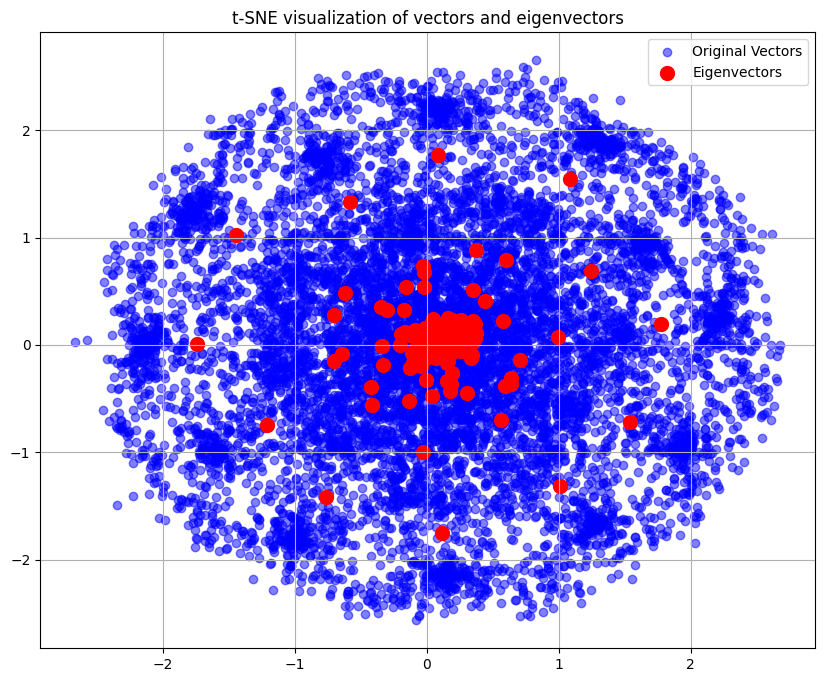

In [9]:
plt = visualize_vectors_tsne(vectors, eigenvectors)
plt.show()

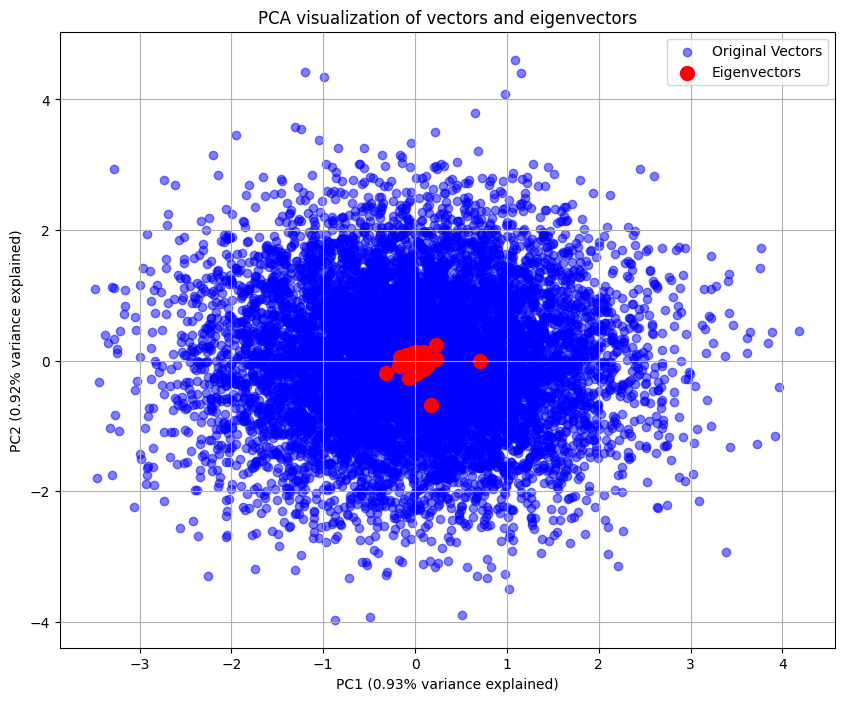

In [8]:
plt, pca = visualize_vectors_pca(vectors, eigenvectors)
plt.show()